In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 =  pd.read_csv('term-deposit-marketing-2020.csv')

In [6]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


<AxesSubplot:xlabel='y', ylabel='count'>

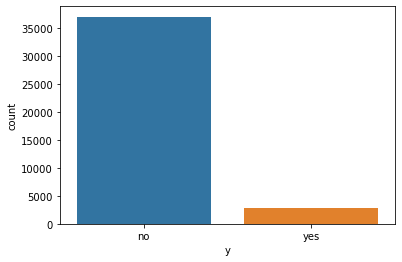

In [21]:
# The dataset is highly imbalanced. Less than 10 % are the 'yes' group (subscribed to a term deposit account)
# This is the group that is of interest to us. 
# That is, which customer characteristics will make him/her to subscribe to a term deposit account

sns.countplot(x='y', data=df1)

In [34]:
df1[df1['y']=='no']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39993,32,management,married,tertiary,no,3154,no,no,cellular,3,jun,126,1,no
39994,35,management,married,tertiary,no,3109,yes,no,cellular,3,jun,467,1,no
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


In [78]:
df1['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

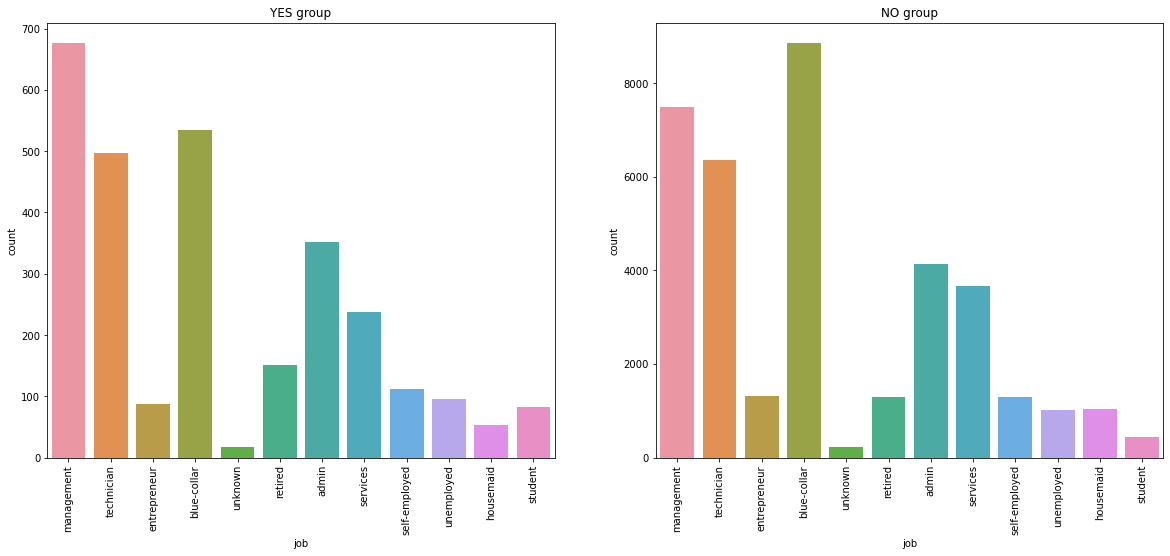

In [62]:
# just the 'yes' group count is plotted vs. the job type
# similar job profiles in both groups indicating that the job type does not determine the probability of 
# subscribing for a term deposit account
order = ['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student']
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.countplot(x='job', data=df1[df1['y']=='yes'], order = order, ax=ax1).set(title='YES group')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
sns.countplot(x='job', data=df1[df1['y']=='no'], order = order, ax=ax2).set(title='NO group')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

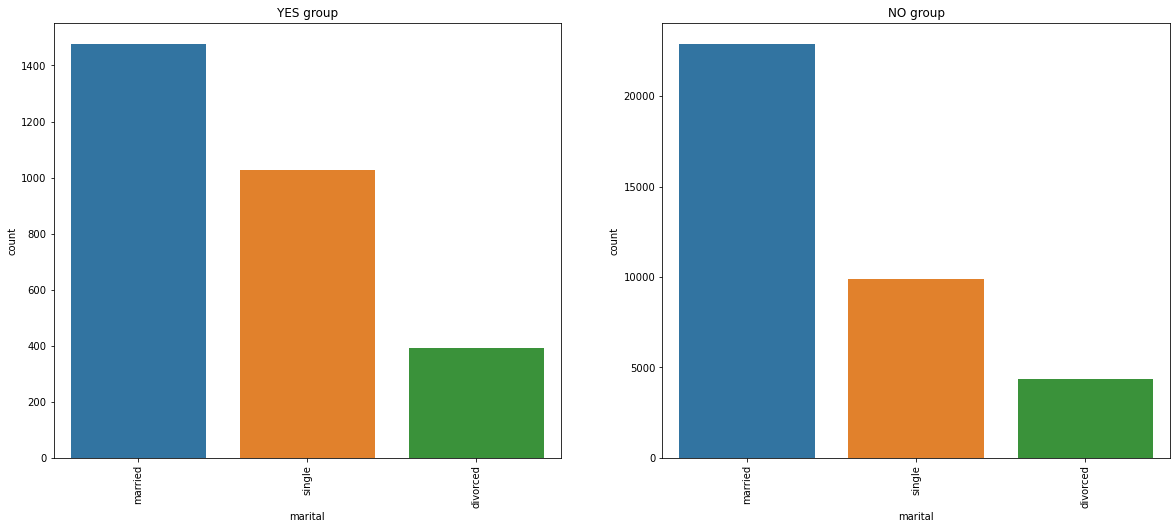

In [64]:
# marital status does not appear to be a clear determinant of subscribing to an account
# though there appears to be higher proportion of single people subscribing
order = ['married', 'single', 'divorced']
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.countplot(x='marital', data=df1[df1['y']=='yes'], order = order, ax=ax1).set(title='YES group')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
sns.countplot(x='marital', data=df1[df1['y']=='no'], order = order, ax=ax2).set(title='NO group')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

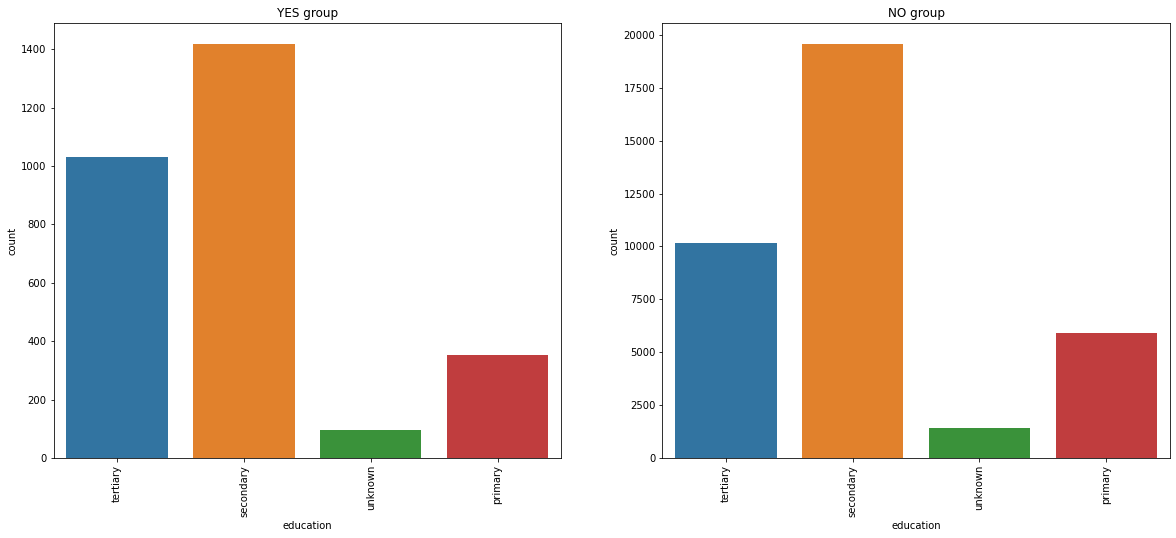

In [66]:
# customers with post-secondary (tertiary) education are slightly more likely to subscribe to the term deposit account
order = ['tertiary', 'secondary', 'unknown', 'primary']
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.countplot(x='education', data=df1[df1['y']=='yes'], order = order, ax=ax1).set(title='YES group')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
sns.countplot(x='education', data=df1[df1['y']=='no'], order = order, ax=ax2).set(title='NO group')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

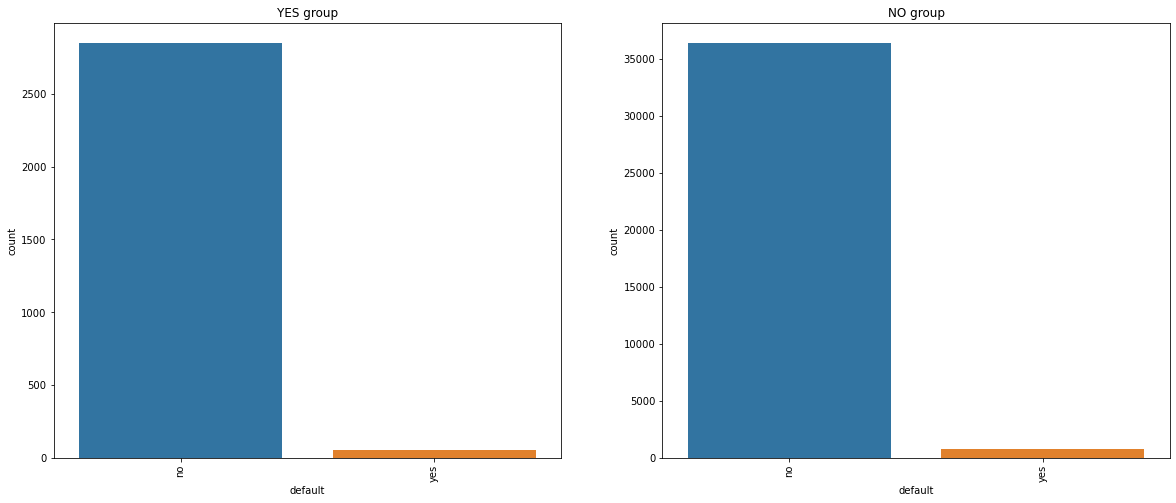

In [68]:
# most subscribers and non-subscribers have no credit default
order = ['no', 'yes']
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.countplot(x='default', data=df1[df1['y']=='yes'], order = order, ax=ax1).set(title='YES group')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
sns.countplot(x='default', data=df1[df1['y']=='no'], order = order, ax=ax2).set(title='NO group')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

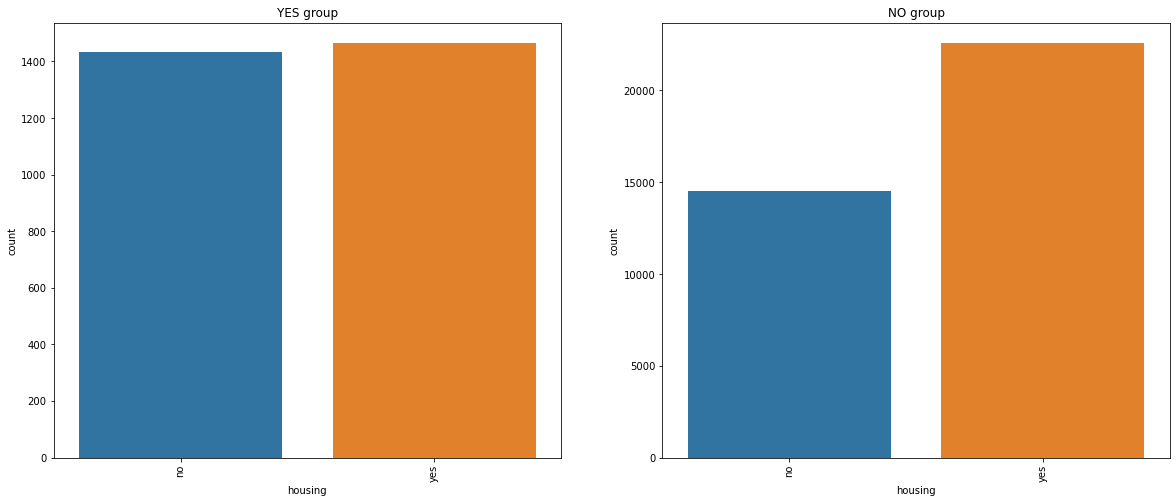

In [70]:
# Equal proportions of the YES group either have or do not have a housing loan.
# In the NO group, more customers have a housing loan than those who do not
order = ['no', 'yes']
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.countplot(x='housing', data=df1[df1['y']=='yes'], order = order, ax=ax1).set(title='YES group')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
sns.countplot(x='housing', data=df1[df1['y']=='no'], order = order, ax=ax2).set(title='NO group')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

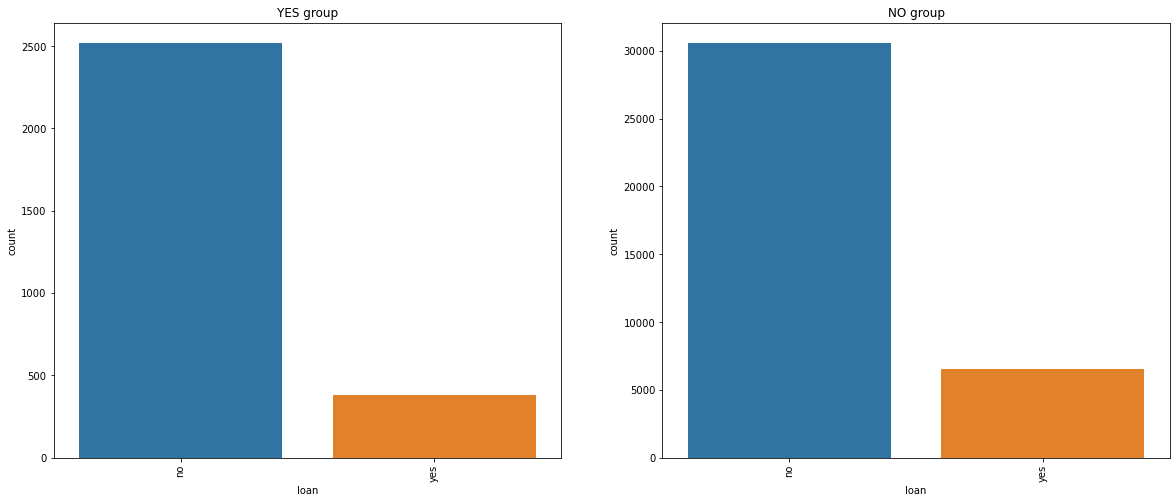

In [71]:
# most people in both groups do not have a personal loan with the bank
order = ['no', 'yes']
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.countplot(x='loan', data=df1[df1['y']=='yes'], order = order, ax=ax1).set(title='YES group')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
sns.countplot(x='loan', data=df1[df1['y']=='no'], order = order, ax=ax2).set(title='NO group')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

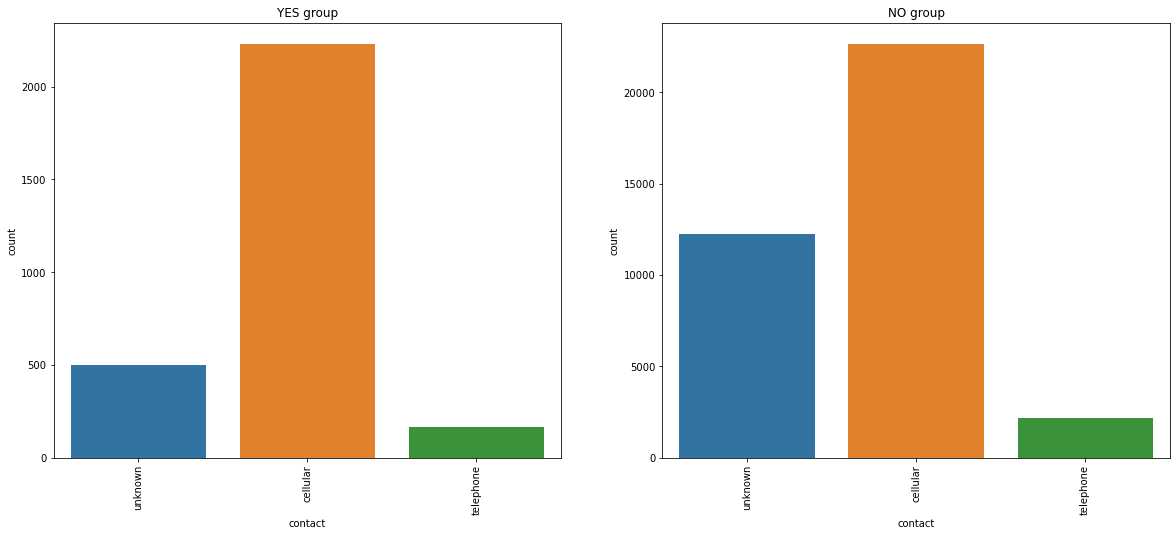

In [73]:
# most people in both groups were contacted on their cell phones. 
# a bigger proportion of the NO group were contacted via an unknow method compared to that of the YES group
order = ['unknown', 'cellular', 'telephone']
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.countplot(x='contact', data=df1[df1['y']=='yes'], order = order, ax=ax1).set(title='YES group')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
sns.countplot(x='contact', data=df1[df1['y']=='no'], order = order, ax=ax2).set(title='NO group')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

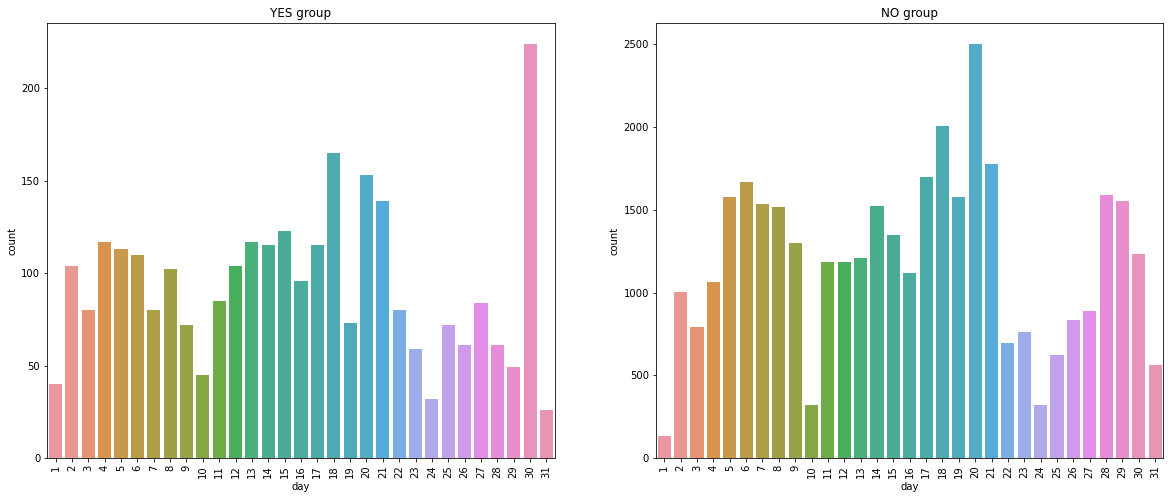

In [77]:
# There is no clear distinction between the groups as to which day of the month they were contacted.

order = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,
        21,22,23,24,25,26,27,28,29,30,31]
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.countplot(x='day', data=df1[df1['y']=='yes'], order = order, ax=ax1).set(title='YES group')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
sns.countplot(x='day', data=df1[df1['y']=='no'], order = order, ax=ax2).set(title='NO group')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

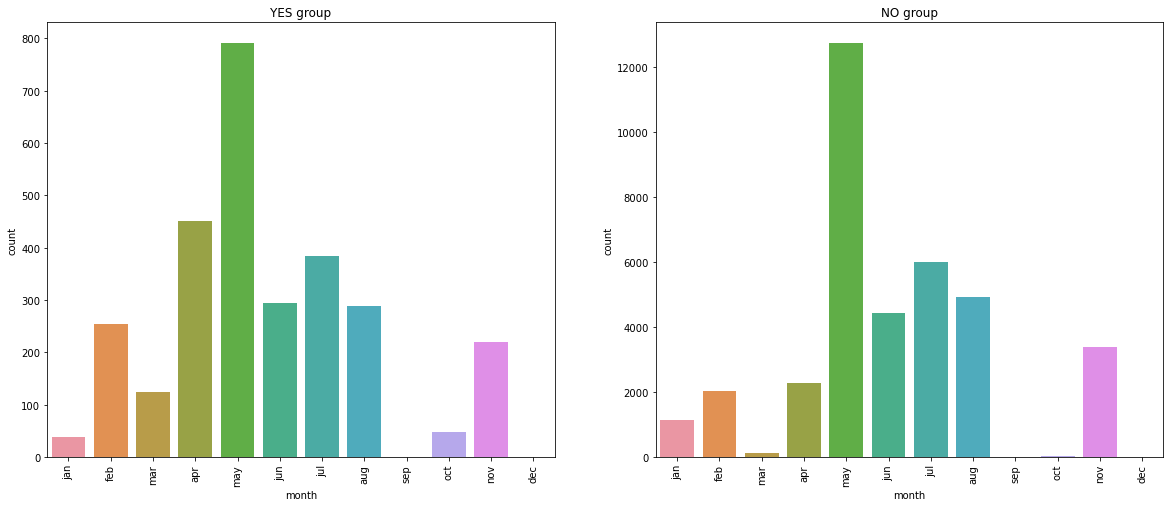

In [75]:
# There is no clear distinction between the groups as to which month they were contacted. There may be a slight
# increase in the YES groups for the months of Feb, March and April

order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.countplot(x='month', data=df1[df1['y']=='yes'], order = order, ax=ax1).set(title='YES group')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
sns.countplot(x='month', data=df1[df1['y']=='no'], order = order, ax=ax2).set(title='NO group')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

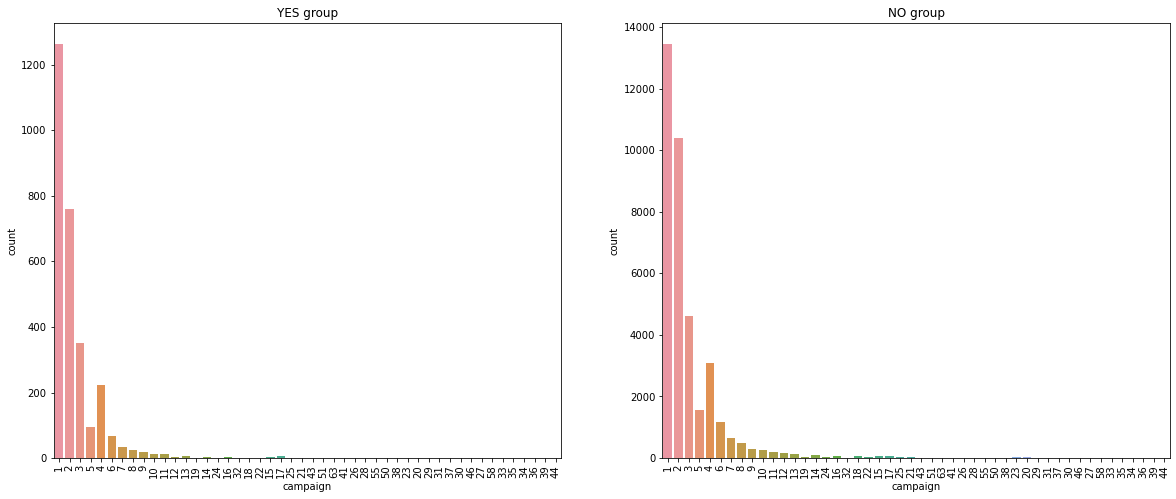

In [79]:
# There is no clear distinction between the groups as to the number of times the customers were contacted. 
# The number of contacts mostly ranged from 1 to 3.

order = [ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44]
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.countplot(x='campaign', data=df1[df1['y']=='yes'], order = order, ax=ax1).set(title='YES group')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
sns.countplot(x='campaign', data=df1[df1['y']=='no'], order = order, ax=ax2).set(title='NO group')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

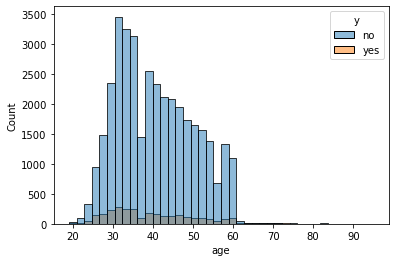

In [82]:
sns.histplot(x='age', hue='y', data=df1, bins=40)

<AxesSubplot:xlabel='age', ylabel='Density'>

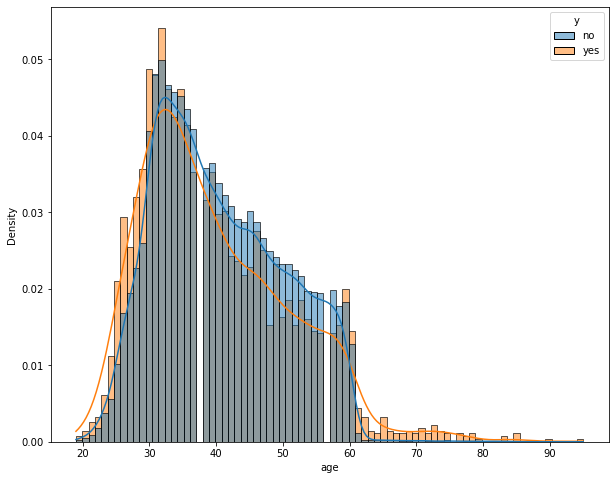

In [96]:
plt.figure(figsize=(10,8))
sns.histplot(x='age', hue='y', data=df1, stat="density", common_norm=False, kde=True, bins=80)

(-10.0, 20000.0)

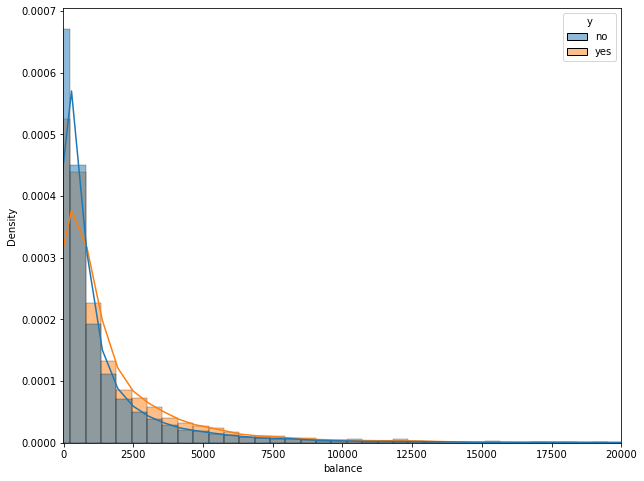

In [99]:
plt.figure(figsize=(10,8))
sns.histplot(x='balance', hue='y', data=df1, stat="density", common_norm=False, kde=True, bins=200)
plt.xlim([-10,20000])

In [128]:
# make a deep copy of df1
df2 = df1.copy()

In [129]:
# replace all 'no's with 0 and 'yes' with 1 in the whole dataframe
df2.replace({'no':0, 'yes':1}, inplace = True)

In [115]:
df2.marital.value_counts()

married     24386
single      10889
divorced     4725
Name: marital, dtype: int64

In [130]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,0


In [131]:
#create dummy columns for the following columns, and drop the first of the dummy columns
df3 = pd.get_dummies(df2, columns=['job','marital','month','education','contact', 'day'], drop_first=True)

In [132]:
df3.head()

,age,default,balance,housing,loan,duration,campaign,y,job_blue-collar,job_entrepreneur,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,58,0,2143,1,0,261,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33,0,2,1,1,76,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
# specify dependent and independent variables
X = df3.drop('y', axis=1)
y = df3['y']

In [147]:
# due to the imbalanced nature of the dataset

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5, random_state = None, shuffle = True)

In [145]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=100, learning_rate=0.6)

In [149]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [152]:
accuracy_scores =[]

gp_0_precision_scores = []
gp_1_precision_scores = []
gp_0_recall_scores = []
gp_1_recall_scores = []
gp_0_f1_scores = []
gp_1_f1_scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.loc[train_index].values, X.loc[test_index].values
    y_train, y_test = y[train_index].values, y[test_index].values
    xgb.fit(X_train, y_train)
    predict = xgb.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, predict))
    gp_0_precision_scores.append(precision_score(y_test, predict, average=None)[0])
    gp_1_precision_scores.append(precision_score(y_test, predict, average=None)[1])
    gp_0_recall_scores.append(recall_score(y_test, predict, average=None)[0])
    gp_1_recall_scores.append(recall_score(y_test, predict, average=None)[1])
    gp_0_f1_scores.append(f1_score(y_test, predict, average=None)[0])
    gp_1_f1_scores.append(f1_score(y_test, predict, average=None)[1])
    

print('OVERALL ACCURACY: ', np.mean(accuracy_scores))
print('')
print('GROUP 0 (NO)  PRECISION SCORE: ',np.mean(gp_0_precision_scores))
print('GROUP 1 (YES) PRECISION SCORE: ',np.mean(gp_1_precision_scores))
print('GROUP 0 (NO) RECALL SCORE    : ',np.mean(gp_0_recall_scores))
print('GROUP 1 (YES)RECALL SCORE    : ',np.mean(gp_1_recall_scores))
print('GROUP 0 (NO) F1 SCORE    : ',np.mean(gp_0_f1_scores))
print('GROUP 1 (YES)F1 SCORE    : ',np.mean(gp_1_f1_scores))   

OVERALL ACCURACY:  0.9332999999999998

GROUP 0 (NO)  PRECISION SCORE:  0.9548541060003902
GROUP 1 (YES) PRECISION SCORE:  0.5531537838261787
GROUP 0 (NO) RECALL SCORE    :  0.9741537328866758
GROUP 1 (YES)RECALL SCORE    :  0.40986421297123454
GROUP 0 (NO) F1 SCORE    :  0.9644067493354396
GROUP 1 (YES)F1 SCORE    :  0.47075302203789426


The overall accuracy is very good and above 90% But, the above metrics indicate that this is because of the imbalanced nature of the dataset. Since GROUP 0 (NO group) is the largest, the model is able to readily identify those belonging to this group in the test dataset. However, the metrics, especially recall and f1-scores are poor for GROUP 1 (YES group). 